# Class comparison

## Setup

In [1]:
import util.local_config as local_config
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from util.helper_functions.classification_report_output_processon import print_classification_report

In [2]:
# Get the ground truth labels
ground_truth_labels = local_config.GROUND_TRUTH_LABELS

# Get the speech and text model results dataframes
speech_model_results = local_config.SPEECH_MODEL_RESULTS
text_model_results = local_config.TEXT_MODEL_RESULTS

# Merge the ground truth labels with the speech model results
speech_model_results = pd.merge(speech_model_results, ground_truth_labels, on=['dialogue_id', 'utterance_id'])

# Merge the ground truth labels with the text model results
text_model_results = pd.merge(text_model_results, ground_truth_labels, on=['dialogue_id', 'utterance_id'])

## Main

### Confusion matrices

In [3]:
# Calculate the confusion matrix for the text model
text_confusion_matrix = confusion_matrix(text_model_results['ground_truth_emotion_one_hot_index'], text_model_results['model_prediction'])

# Calculate the confusion matrix for the speech model
speech_confusion_matrix = confusion_matrix(speech_model_results['ground_truth_emotion_one_hot_index'], speech_model_results['model_prediction'])

#### Text model confusion matrix

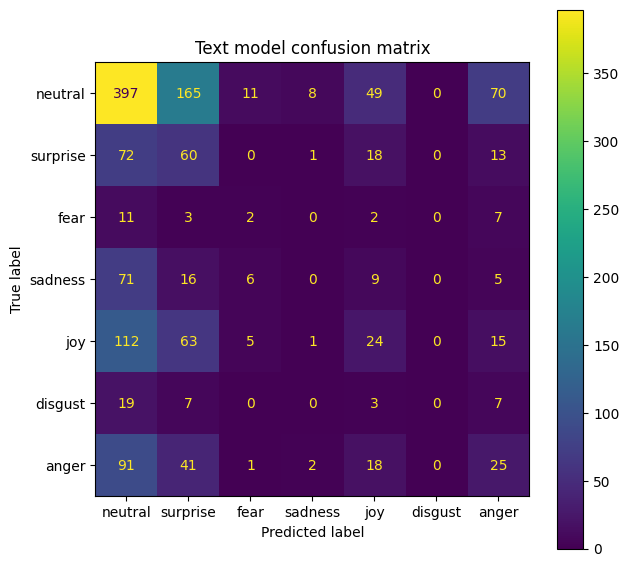

In [4]:
# Set the figure
fig, ax = plt.subplots(figsize=(7, 7))

# Set the title
ax.set_title('Text model confusion matrix')

# Set the axis labels
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

# Show the confusion matrix
ConfusionMatrixDisplay(
    confusion_matrix=text_confusion_matrix, 
    display_labels=local_config.EMOTION_LABELS_STRINGS
).plot(ax=ax)

plt.show()

#### Speech model confusion matrix

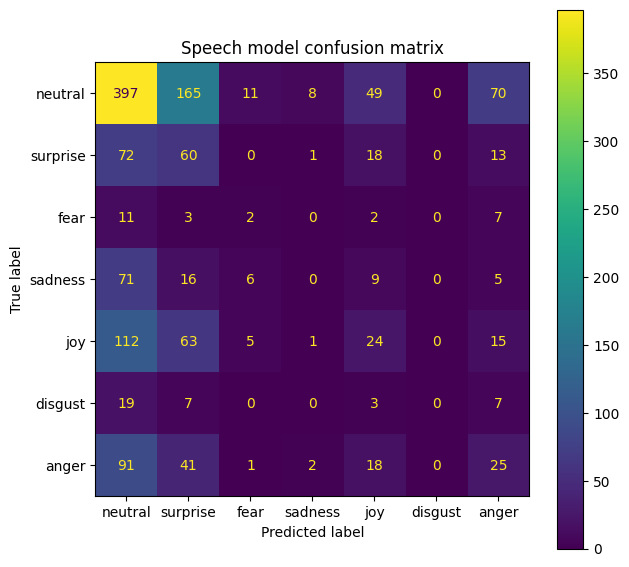

In [5]:
# Set the figure
fig, ax = plt.subplots(figsize=(7, 7))

# Set the title
ax.set_title('Speech model confusion matrix')

# Set the axis labels
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

# Show the confusion matrix
ConfusionMatrixDisplay(
    confusion_matrix=speech_confusion_matrix, 
    display_labels=local_config.EMOTION_LABELS_STRINGS
).plot(ax=ax)

plt.show()

### Classification reports

#### Text model

In [6]:
text_classification_report = classification_report(
    y_true=text_model_results['ground_truth_emotion_one_hot_index'], 
    y_pred=text_model_results['model_prediction'], 
    target_names=local_config.EMOTION_LABELS_STRINGS, 
    output_dict=True,
    zero_division=0
)

In [7]:
# Print the classification report
print_classification_report(text_classification_report)

Neutral
------------------------------------
precision: 0.5135834411384217
recall: 0.5671428571428572
f1-score: 0.5390359809911744
support: 700

Surprise:
------------------------------------
precision: 0.16901408450704225
recall: 0.36585365853658536
f1-score: 0.23121387283236994
support: 164

Fear:
------------------------------------
precision: 0.08
recall: 0.08
f1-score: 0.08
support: 25

Sadness:
------------------------------------
precision: 0.0
recall: 0.0
f1-score: 0.0
support: 107

Joy:
------------------------------------
precision: 0.1951219512195122
recall: 0.10909090909090909
f1-score: 0.13994169096209913
support: 220

Disgust:
------------------------------------
precision: 0.0
recall: 0.0
f1-score: 0.0
support: 36

Anger:
------------------------------------
precision: 0.176056338028169
recall: 0.1404494382022472
f1-score: 0.15625
support: 178



#### Speech model

In [8]:
speech_classification_report = classification_report(
    y_true=speech_model_results['ground_truth_emotion_one_hot_index'], 
    y_pred=speech_model_results['model_prediction'], 
    target_names=local_config.EMOTION_LABELS_STRINGS, 
    output_dict=True,
    zero_division=0
)

In [9]:
# Print the classification report
print_classification_report(speech_classification_report)

Neutral
------------------------------------
precision: 0.5135834411384217
recall: 0.5671428571428572
f1-score: 0.5390359809911744
support: 700

Surprise:
------------------------------------
precision: 0.16901408450704225
recall: 0.36585365853658536
f1-score: 0.23121387283236994
support: 164

Fear:
------------------------------------
precision: 0.08
recall: 0.08
f1-score: 0.08
support: 25

Sadness:
------------------------------------
precision: 0.0
recall: 0.0
f1-score: 0.0
support: 107

Joy:
------------------------------------
precision: 0.1951219512195122
recall: 0.10909090909090909
f1-score: 0.13994169096209913
support: 220

Disgust:
------------------------------------
precision: 0.0
recall: 0.0
f1-score: 0.0
support: 36

Anger:
------------------------------------
precision: 0.176056338028169
recall: 0.1404494382022472
f1-score: 0.15625
support: 178

